In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading datas
dim_ad=pd.read_excel('dim_ad_category.xlsx')
dim_city=pd.read_excel('dim_city.xlsx')
fact_ad_revenue=pd.read_csv("fact_ad_revenue.csv")
fact_city=pd.read_csv('fact_city_readiness.csv')
fact_digital=pd.read_csv('fact_digital_pilot.csv')
fact_sales=pd.read_excel('fact_print_sales.xlsx')

In [3]:
dim_ad.head()

ad_category_id standard_ad_category     category_group       example_brands
0           A001           Government      Public Sector             LIC, SBI
1           A002                 FMCG  Commercial Brands       HUL, Britannia
2           A003          Real Estate     Private Sector           DLF, Lodha
3           A004           Automobile  Commercial Brands  Tata Motors, Maruti

In [4]:
dim_ad.shape

(4, 4)

In [5]:
dim_city.head()

city_id     city           state    tier
0    C001  lucknow   Uttar Pradesh  Tier 2
1    C002    Delhi           DELHI  Tier 1
2    C003   bhopal  Madhya Pradesh  Tier 2
3    C004    Patna           BIHAR  Tier 2
4    C005   jaipur       Rajasthan  Tier 2

In [6]:
dim_city.shape

(10, 4)

In [7]:
dim_city

city_id       city           state    tier
0    C001    lucknow   Uttar Pradesh  Tier 2
1    C002      Delhi           DELHI  Tier 1
2    C003     bhopal  Madhya Pradesh  Tier 2
3    C004      Patna           BIHAR  Tier 2
4    C005     jaipur       Rajasthan  Tier 2
5    C006     Mumbai     MAHARASHTRA  Tier 1
6    C007     ranchi       JHARKHAND  Tier 3
7    C008     kanpur   UTTAR PRADESH  Tier 2
8    C009  Ahmedabad         GUJARAT  Tier 1
9    C010   Varanasi   Uttar Pradesh  Tier 2

In [8]:
fact_ad_revenue.head()

edition_id ad_category   quarter_old  Ad_revenue_euro  Ad_revenue_inr  Year  \
0     ED1005        A001       2023-Q2       22613.6900    2.004251e+06  2023   
1     ED1005        A002       Q1-2019       33461.8480    2.965724e+06  2019   
2     ED1001        A003       Q3-2023       40808.4600    3.616854e+06  2023   
3     ED1003        A002       Q3-2023       34824.1175    3.086462e+06  2023   
4     ED1007        A003  4th Qtr 2020       44012.4900    3.900827e+06  2020   

  Quarter  
0      Q2  
1      Q1  
2      Q3  
3      Q3  
4      Q4

In [9]:
fact_ad_revenue.drop('comments',axis=1,inplace=True)

KeyError: "['comments'] not found in axis"

In [11]:
fact_ad_revenue.shape

(720, 7)

In [12]:
fact_ad_revenue.isnull().sum()

edition_id         0
ad_category        0
quarter_old        0
Ad_revenue_euro    0
Ad_revenue_inr     0
Year               0
Quarter            0
dtype: int64

In [13]:
fact_ad_revenue['currency'].value_counts()

KeyError: 'currency'

In [14]:
fact_ad_revenue['currency'].replace('IN RUPEES','INR',inplace=True)

KeyError: 'currency'

In [15]:
fact_ad_revenue['currency'].value_counts()

KeyError: 'currency'

In [16]:
# Define conversion rates to EUR
conversion_rates = {
    'USD': 0.85,
    'INR': 0.011,
    'EUR': 1  # base currency
}

# Apply conversion
fact_ad_revenue['Currency_con'] = fact_ad_revenue['currency'].map(conversion_rates)


KeyError: 'currency'

In [17]:
fact_ad_revenue['Ad_revenue_euro']=fact_ad_revenue['Currency_con']*fact_ad_revenue['ad_revenue']

KeyError: 'Currency_con'

In [18]:
fact_ad_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   edition_id       720 non-null    object 
 1   ad_category      720 non-null    object 
 2   quarter_old      720 non-null    object 
 3   Ad_revenue_euro  720 non-null    float64
 4   Ad_revenue_inr   720 non-null    float64
 5   Year             720 non-null    int64  
 6   Quarter          720 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 39.5+ KB


In [19]:
fact_ad_revenue.drop(['Currency_con','ad_revenue'],axis=1,inplace=True)

KeyError: "['Currency_con', 'ad_revenue'] not found in axis"

In [20]:
fact_ad_revenue.head()

edition_id ad_category   quarter_old  Ad_revenue_euro  Ad_revenue_inr  Year  \
0     ED1005        A001       2023-Q2       22613.6900    2.004251e+06  2023   
1     ED1005        A002       Q1-2019       33461.8480    2.965724e+06  2019   
2     ED1001        A003       Q3-2023       40808.4600    3.616854e+06  2023   
3     ED1003        A002       Q3-2023       34824.1175    3.086462e+06  2023   
4     ED1007        A003  4th Qtr 2020       44012.4900    3.900827e+06  2020   

  Quarter  
0      Q2  
1      Q1  
2      Q3  
3      Q3  
4      Q4

In [21]:
fact_ad_revenue.drop(['currency'],axis=1,inplace=True)

KeyError: "['currency'] not found in axis"

In [22]:
fact_ad_revenue['Ad_revenue_inr']=fact_ad_revenue['Ad_revenue_euro']*88.63

In [23]:
fact_ad_revenue.head()

edition_id ad_category   quarter_old  Ad_revenue_euro  Ad_revenue_inr  Year  \
0     ED1005        A001       2023-Q2       22613.6900    2.004251e+06  2023   
1     ED1005        A002       Q1-2019       33461.8480    2.965724e+06  2019   
2     ED1001        A003       Q3-2023       40808.4600    3.616854e+06  2023   
3     ED1003        A002       Q3-2023       34824.1175    3.086462e+06  2023   
4     ED1007        A003  4th Qtr 2020       44012.4900    3.900827e+06  2020   

  Quarter  
0      Q2  
1      Q1  
2      Q3  
3      Q3  
4      Q4

In [24]:
fact_ad_revenue['edition_id'].value_counts()

ED1005    72
ED1001    72
ED1003    72
ED1007    72
ED1006    72
ED1010    72
ED1002    72
ED1009    72
ED1004    72
ED1008    72
Name: edition_id, dtype: int64

In [25]:
fact_ad_revenue['ad_category'].value_counts()

A001    215
A003    213
A002    147
A004    145
Name: ad_category, dtype: int64

In [26]:
fact_ad_revenue['quarter'].value_counts()

KeyError: 'quarter'

In [27]:
# Function to extract year and quarter
def extract_year_quarter(x):
    x = x.strip()
    
    # Handle "Qn-YYYY"
    if "-" in x and x.startswith("Q"):
        q, y = x.split("-")
        return int(y), q
    
    # Handle "YYYY-Qn"
    if "-" in x and x.endswith(("Q1","Q2","Q3","Q4")):
        y, q = x.split("-")
        return int(y), q
    
    # Handle "Nth Qtr YYYY"
    if "Qtr" in x:
        parts = x.split()
        q = parts[0].replace("1st","Q1").replace("2nd","Q2").replace("3rd","Q3").replace("4th","Q4")
        y = parts[-1]
        return int(y), q
    
    return None, None

# Apply function
fact_ad_revenue[['Year','Quarter']] = fact_ad_revenue['quarter'].apply(lambda x: pd.Series(extract_year_quarter(x)))

KeyError: 'quarter'

In [28]:
fact_ad_revenue.head()

edition_id ad_category   quarter_old  Ad_revenue_euro  Ad_revenue_inr  Year  \
0     ED1005        A001       2023-Q2       22613.6900    2.004251e+06  2023   
1     ED1005        A002       Q1-2019       33461.8480    2.965724e+06  2019   
2     ED1001        A003       Q3-2023       40808.4600    3.616854e+06  2023   
3     ED1003        A002       Q3-2023       34824.1175    3.086462e+06  2023   
4     ED1007        A003  4th Qtr 2020       44012.4900    3.900827e+06  2020   

  Quarter  
0      Q2  
1      Q1  
2      Q3  
3      Q3  
4      Q4

In [29]:
fact_ad_revenue.isnull().sum()

edition_id         0
ad_category        0
quarter_old        0
Ad_revenue_euro    0
Ad_revenue_inr     0
Year               0
Quarter            0
dtype: int64

In [30]:
fact_ad_revenue.to_csv('fact_ad_revenue.csv',index=False)

In [31]:
fact_city.head()

city_id  literacy_rate  smartphone_penetration  internet_penetration  Year  \
0    C001          89.16                   75.76                 56.53  2019   
1    C001          88.76                   76.45                 55.97  2019   
2    C001          88.83                   75.32                 56.52  2019   
3    C001          89.25                   75.83                 56.94  2019   
4    C001          89.13                   75.03                 56.45  2020   

  Quarter  
0      Q1  
1      Q2  
2      Q3  
3      Q4  
4      Q1

In [32]:
fact_city.drop('Unnamed: 0',axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [33]:
fact_city['quarter'].value_counts()

KeyError: 'quarter'

In [34]:
def extract_year_quarter(x):
    x = x.strip()
    y,q = x.split("-")  # Etracting quarter and year
    return int(y), q
fact_city[['Year','Quarter']] = fact_city['quarter'].apply(lambda x: pd.Series(extract_year_quarter(x)))


KeyError: 'quarter'

In [35]:
fact_city.head()

city_id  literacy_rate  smartphone_penetration  internet_penetration  Year  \
0    C001          89.16                   75.76                 56.53  2019   
1    C001          88.76                   76.45                 55.97  2019   
2    C001          88.83                   75.32                 56.52  2019   
3    C001          89.25                   75.83                 56.94  2019   
4    C001          89.13                   75.03                 56.45  2020   

  Quarter  
0      Q1  
1      Q2  
2      Q3  
3      Q4  
4      Q1

In [36]:
fact_city.drop('quarter',axis=1,inplace=True)

KeyError: "['quarter'] not found in axis"

In [37]:
fact_city

city_id  literacy_rate  smartphone_penetration  internet_penetration  \
0      C001          89.16                   75.76                 56.53   
1      C001          88.76                   76.45                 55.97   
2      C001          88.83                   75.32                 56.52   
3      C001          89.25                   75.83                 56.94   
4      C001          89.13                   75.03                 56.45   
..      ...            ...                     ...                   ...   
235    C010          70.92                   77.75                 74.83   
236    C010          70.77                   77.29                 74.30   
237    C010          70.79                   77.86                 76.16   
238    C010          70.81                   77.53                 75.04   
239    C010          70.79                   78.67                 75.28   

     Year Quarter  
0    2019      Q1  
1    2019      Q2  
2    2019      Q3  
3    2019      Q4  
4    2020      Q1  
..    ...     ...  
235  2023      Q4  
236  2024      Q1  
237  2024      Q2  
238  2024      Q3  
239  2024      Q4  

[240 rows x 6 columns]

In [38]:
fact_city.to_csv("fact_city_readiness.csv",index=False)

In [39]:
fact_digital.head()

Unnamed: 0           platform launch_month ad_category_id  dev_cost  \
0           0  PDF WhatsApp Push      2021-01           A001    236570   
1           1  PDF WhatsApp Push      2021-02           A001    156865   
2           2  PDF WhatsApp Push      2021-03           A001    242728   
3           3  PDF WhatsApp Push      2021-04           A001    147695   
4           4  PDF WhatsApp Push      2021-05           A001    325906   

   marketing_cost  users_reached  downloads_or_accesses  avg_bounce_rate  \
0           66060          23509                  16319            52.55   
1           99122          19472                  17017            82.53   
2           46087           8471                   2891            68.06   
3           78868          46796                  15640            66.17   
4          135644          16805                   3231            76.90   

                  cumulative_feedback_from_customers city_id     Month  Year  
0  Mixed feedback: some usability concerns, but h...    C001   January  2021  
1  Mixed feedback: some usability concerns, but h...    C002  February  2021  
2  Mixed feedback: some usability concerns, but h...    C003     March  2021  
3  Mixed feedback: some usability concerns, but h...    C004     April  2021  
4  The site takes too long to load on average pho...    C005       May  2021

In [40]:
fact_sales.head()

edition_ID City_ID Language           State    Month Copies Sold  \
0     ED1005    C005    Hindi       Rajasthan      May      404389   
1     ED1005    C005    Hindi       Rajasthan    March      492943   
2     ED1001    C001    hindi   Uttar pradesh     July      168893   
3     ED1003    C003    Hindi  Madhya_Pradesh     July      216540   
4     ED1007    C007    Hindi       Jharkhand  October      234563   

   copies_returned  Net_Circulation  Year  Day  Day_Name  
0            13510           390879  2023    1    Monday  
1            25024           467919  2019    1    Friday  
2            12285           156608  2023    1  Saturday  
3            10117           206423  2023    1  Saturday  
4            13048           221515  2020    1  Thursday

In [41]:
fact_sales.isnull().sum()

edition_ID         0
City_ID            0
Language           0
State              0
Month              0
Copies Sold        0
copies_returned    0
Net_Circulation    0
Year               0
Day                0
Day_Name           0
dtype: int64

In [42]:
fact_sales['Year']       = pd.to_datetime(fact_sales['Month']).dt.year
fact_sales['Day']        = pd.to_datetime(fact_sales['Month']).dt.day
fact_sales['Day_Name']   = pd.to_datetime(fact_sales['Month']).dt.day_name()
fact_sales['Month'] = pd.to_datetime(fact_sales['Month']).dt.month_name()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-05-01 00:00:00 present at position 0

In [43]:
fact_sales.head()

edition_ID City_ID Language           State    Month Copies Sold  \
0     ED1005    C005    Hindi       Rajasthan      May      404389   
1     ED1005    C005    Hindi       Rajasthan    March      492943   
2     ED1001    C001    hindi   Uttar pradesh     July      168893   
3     ED1003    C003    Hindi  Madhya_Pradesh     July      216540   
4     ED1007    C007    Hindi       Jharkhand  October      234563   

   copies_returned  Net_Circulation  Year  Day  Day_Name  
0            13510           390879  2023    1    Monday  
1            25024           467919  2019    1    Friday  
2            12285           156608  2023    1  Saturday  
3            10117           206423  2023    1  Saturday  
4            13048           221515  2020    1  Thursday

<Axes: >

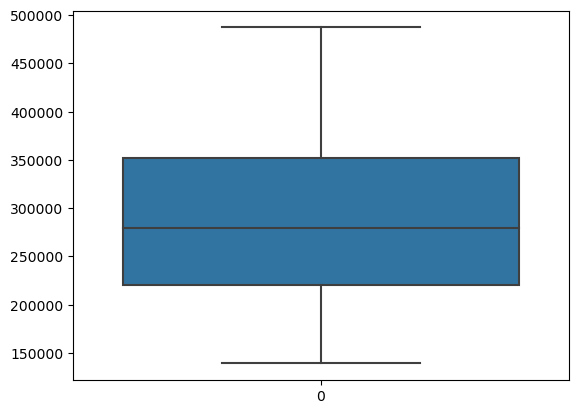

In [44]:
sns.boxplot(fact_sales['Net_Circulation'])

In [45]:
fact_sales.to_excel('fact_print_sales.xlsx',index=False)

In [46]:
fact_digital.head()

Unnamed: 0           platform launch_month ad_category_id  dev_cost  \
0           0  PDF WhatsApp Push      2021-01           A001    236570   
1           1  PDF WhatsApp Push      2021-02           A001    156865   
2           2  PDF WhatsApp Push      2021-03           A001    242728   
3           3  PDF WhatsApp Push      2021-04           A001    147695   
4           4  PDF WhatsApp Push      2021-05           A001    325906   

   marketing_cost  users_reached  downloads_or_accesses  avg_bounce_rate  \
0           66060          23509                  16319            52.55   
1           99122          19472                  17017            82.53   
2           46087           8471                   2891            68.06   
3           78868          46796                  15640            66.17   
4          135644          16805                   3231            76.90   

                  cumulative_feedback_from_customers city_id     Month  Year  
0  Mixed feedback: some usability concerns, but h...    C001   January  2021  
1  Mixed feedback: some usability concerns, but h...    C002  February  2021  
2  Mixed feedback: some usability concerns, but h...    C003     March  2021  
3  Mixed feedback: some usability concerns, but h...    C004     April  2021  
4  The site takes too long to load on average pho...    C005       May  2021

In [47]:
fact_digital['Month']       = pd.to_datetime(fact_digital['launch_month']).dt.month_name()
fact_digital['Year']        = pd.to_datetime(fact_digital['launch_month']).dt.year

In [48]:
fact_digital.head()

Unnamed: 0           platform launch_month ad_category_id  dev_cost  \
0           0  PDF WhatsApp Push      2021-01           A001    236570   
1           1  PDF WhatsApp Push      2021-02           A001    156865   
2           2  PDF WhatsApp Push      2021-03           A001    242728   
3           3  PDF WhatsApp Push      2021-04           A001    147695   
4           4  PDF WhatsApp Push      2021-05           A001    325906   

   marketing_cost  users_reached  downloads_or_accesses  avg_bounce_rate  \
0           66060          23509                  16319            52.55   
1           99122          19472                  17017            82.53   
2           46087           8471                   2891            68.06   
3           78868          46796                  15640            66.17   
4          135644          16805                   3231            76.90   

                  cumulative_feedback_from_customers city_id     Month  Year  
0  Mixed feedback: some usability concerns, but h...    C001   January  2021  
1  Mixed feedback: some usability concerns, but h...    C002  February  2021  
2  Mixed feedback: some usability concerns, but h...    C003     March  2021  
3  Mixed feedback: some usability concerns, but h...    C004     April  2021  
4  The site takes too long to load on average pho...    C005       May  2021

In [49]:
fact_sales.head()

edition_ID City_ID Language           State    Month Copies Sold  \
0     ED1005    C005    Hindi       Rajasthan      May      404389   
1     ED1005    C005    Hindi       Rajasthan    March      492943   
2     ED1001    C001    hindi   Uttar pradesh     July      168893   
3     ED1003    C003    Hindi  Madhya_Pradesh     July      216540   
4     ED1007    C007    Hindi       Jharkhand  October      234563   

   copies_returned  Net_Circulation  Year  Day  Day_Name  
0            13510           390879  2023    1    Monday  
1            25024           467919  2019    1    Friday  
2            12285           156608  2023    1  Saturday  
3            10117           206423  2023    1  Saturday  
4            13048           221515  2020    1  Thursday

In [50]:
fact_sales.rename(columns={'edition_ID':'edition_id'},inplace=True)

In [51]:
fact_digital.to_csv("fact_digital_pilot.csv",index=False)

In [52]:
fact_sales.to_csv('fact_print_sales.csv',index=False)

In [53]:
fact_ad_revenue.head()

edition_id ad_category   quarter_old  Ad_revenue_euro  Ad_revenue_inr  Year  \
0     ED1005        A001       2023-Q2       22613.6900    2.004251e+06  2023   
1     ED1005        A002       Q1-2019       33461.8480    2.965724e+06  2019   
2     ED1001        A003       Q3-2023       40808.4600    3.616854e+06  2023   
3     ED1003        A002       Q3-2023       34824.1175    3.086462e+06  2023   
4     ED1007        A003  4th Qtr 2020       44012.4900    3.900827e+06  2020   

  Quarter  
0      Q2  
1      Q1  
2      Q3  
3      Q3  
4      Q4

In [54]:
fact_city.head()

city_id  literacy_rate  smartphone_penetration  internet_penetration  Year  \
0    C001          89.16                   75.76                 56.53  2019   
1    C001          88.76                   76.45                 55.97  2019   
2    C001          88.83                   75.32                 56.52  2019   
3    C001          89.25                   75.83                 56.94  2019   
4    C001          89.13                   75.03                 56.45  2020   

  Quarter  
0      Q1  
1      Q2  
2      Q3  
3      Q4  
4      Q1

In [55]:
fact_sales.shape

(720, 11)

In [56]:
fact_ad_revenue.shape

(720, 7)

In [57]:
fact_city.shape

(240, 6)

In [58]:
sales_revenue = pd.merge(fact_sales, fact_ad_revenue, on='edition_id', how='left')

In [59]:
sales_revenue.head()

edition_id City_ID Language      State Month Copies Sold  copies_returned  \
0     ED1005    C005    Hindi  Rajasthan   May      404389            13510   
1     ED1005    C005    Hindi  Rajasthan   May      404389            13510   
2     ED1005    C005    Hindi  Rajasthan   May      404389            13510   
3     ED1005    C005    Hindi  Rajasthan   May      404389            13510   
4     ED1005    C005    Hindi  Rajasthan   May      404389            13510   

   Net_Circulation  Year_x  Day Day_Name ad_category   quarter_old  \
0           390879    2023    1   Monday        A001       2023-Q2   
1           390879    2023    1   Monday        A002       Q1-2019   
2           390879    2023    1   Monday        A002       2019-Q2   
3           390879    2023    1   Monday        A003       2022-Q2   
4           390879    2023    1   Monday        A001  4th Qtr 2021   

   Ad_revenue_euro  Ad_revenue_inr  Year_y Quarter  
0        22613.690    2.004251e+06    2023      Q2  
1        33461.848    2.965724e+06    2019      Q1  
2        33791.703    2.994959e+06    2019      Q2  
3        14836.008    1.314915e+06    2022      Q2  
4        22148.995    1.963065e+06    2021      Q4

In [60]:
sales_revenue.to_csv('sales_revenue_combined.csv',index=False)

In [61]:
combined_data=pd.read_csv('combined_data.csv')

In [62]:
fact_sales.head()

edition_id City_ID Language           State    Month Copies Sold  \
0     ED1005    C005    Hindi       Rajasthan      May      404389   
1     ED1005    C005    Hindi       Rajasthan    March      492943   
2     ED1001    C001    hindi   Uttar pradesh     July      168893   
3     ED1003    C003    Hindi  Madhya_Pradesh     July      216540   
4     ED1007    C007    Hindi       Jharkhand  October      234563   

   copies_returned  Net_Circulation  Year  Day  Day_Name  
0            13510           390879  2023    1    Monday  
1            25024           467919  2019    1    Friday  
2            12285           156608  2023    1  Saturday  
3            10117           206423  2023    1  Saturday  
4            13048           221515  2020    1  Thursday

In [63]:
fact_sales['State'].replace('Uttar-Pradesh','Uttar Pradesh',inplace=True)

In [64]:
def clean_copies_sold(text):
    text=str(text)
    if 'â‚¹' in text:
        text=text.replace('â‚¹','')
    return text
fact_sales['Copies Sold']=fact_sales['Copies Sold'].apply(clean_copies_sold)

In [65]:
fact_sales['Copies Sold']=fact_sales['Copies Sold'].astype(int)

In [66]:
fact_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   edition_id       720 non-null    object
 1   City_ID          720 non-null    object
 2   Language         720 non-null    object
 3   State            720 non-null    object
 4   Month            720 non-null    object
 5   Copies Sold      720 non-null    int32 
 6   copies_returned  720 non-null    int64 
 7   Net_Circulation  720 non-null    int64 
 8   Year             720 non-null    int64 
 9   Day              720 non-null    int64 
 10  Day_Name         720 non-null    object
dtypes: int32(1), int64(4), object(6)
memory usage: 59.2+ KB


In [41]:
import pandas as pd

# Group by Year and calculate totals
yearly_trends = fact_sales.groupby('Year')[['Copies Sold', 'copies_returned', 'Net_Circulation']].sum().reset_index()

# Calculate Year-over-Year change (%) for each metric
for col in ['Copies Sold', 'copies_returned', 'Net_Circulation']:
    yearly_trends[f'{col}_YoY_Change_%'] = yearly_trends[col].pct_change() * 100

print(yearly_trends)


   Year  Copies Sold  copies_returned  Net_Circulation  \
0  2019     41848668          2260502         39588166   
1  2020     39719961          2153120         37566841   
2  2021     37501500          2013276         35488224   
3  2022     35395333          1872515         33522818   
4  2023     33363340          1802057         31561283   
5  2024     31325782          1728717         29597065   

   Copies Sold_YoY_Change_%  copies_returned_YoY_Change_%  \
0                       NaN                           NaN   
1                 -5.086678                     -4.750361   
2                 -5.585255                     -6.494947   
3                 -5.616221                     -6.991639   
4                 -5.740850                     -3.762747   
5                 -6.107176                     -4.069794   

   Net_Circulation_YoY_Change_%  
0                           NaN  
1                     -5.105882  
2                     -5.533116  
3                     -5.5381

In [42]:
yearly_trends

Year  Copies Sold  copies_returned  Net_Circulation  \
0  2019     41848668          2260502         39588166   
1  2020     39719961          2153120         37566841   
2  2021     37501500          2013276         35488224   
3  2022     35395333          1872515         33522818   
4  2023     33363340          1802057         31561283   
5  2024     31325782          1728717         29597065   

   Copies Sold_YoY_Change_%  copies_returned_YoY_Change_%  \
0                       NaN                           NaN   
1                 -5.086678                     -4.750361   
2                 -5.585255                     -6.494947   
3                 -5.616221                     -6.991639   
4                 -5.740850                     -3.762747   
5                 -6.107176                     -4.069794   

   Net_Circulation_YoY_Change_%  
0                           NaN  
1                     -5.105882  
2                     -5.533116  
3                     -5.538192  
4                     -5.851343  
5                     -6.223505

In [8]:
fact_sales.columns

Index(['edition_ID', 'City_ID', 'Language', 'State', 'Month', 'Copies Sold',
       'copies_returned', 'Net_Circulation', 'Year', 'Day', 'Day_Name'],
      dtype='object')

In [50]:
import pandas as pd

# Group by State and Year, then sum up the metrics
state_yearly_trends = fact_sales.groupby(['State', 'Year'])[['Copies Sold', 'copies_returned', 'Net_Circulation']].sum().reset_index()

# Calculate YoY percentage change *within each state*
state_yearly_trends[['Copies Sold_YoY_%', 'copies_returned_YoY_%', 'Net_Circulation_YoY_%']] = (
    state_yearly_trends
    .groupby('State')[['Copies Sold', 'copies_returned', 'Net_Circulation']]
    .pct_change() * 100
)

print(state_yearly_trends)


             State  Year  Copies Sold  copies_returned  Net_Circulation  \
0            Delhi  2019      4608301           254043          4354258   
1            Delhi  2020      4382689           225320          4157369   
2            Delhi  2021      4132354           227685          3904669   
3            Delhi  2022      3922226           215770          3706456   
4            Delhi  2023      3667507           220538          3446969   
5            Delhi  2024      3478045           226035          3252010   
6        Jharkhand  2019      2934975           159180          2775795   
7        Jharkhand  2020      2847570           148897          2698673   
8        Jharkhand  2021      2688869           118508          2570361   
9        Jharkhand  2022      2502683           140289          2362394   
10       Jharkhand  2023      2367809           127066          2240743   
11       Jharkhand  2024      2200753           108691          2092062   
12  Madhya_Pradesh  2019 

In [51]:
for state in state_yearly_trends['State'].unique():
    data = state_yearly_trends[state_yearly_trends['State'] == state]
    plt.figure(figsize=(8,4))
    plt.plot(data['Year'], data['Net_Circulation'], marker='o', label='Net Circulation')
    plt.plot(data['Year'], data['Copies Sold'], marker='o', label='Copies Sold')
    plt.title(f"Trend in Circulation - {state}")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)

    # ✅ Save file correctly
    plt.savefig(f"{state}.png")  # or f"{state.replace(' ', '_')}.png" for no spaces
    plt.close()

In [52]:
fact_sales.head()

edition_ID City_ID Language           State    Month  Copies Sold  \
0     ED1005    C005    Hindi       Rajasthan      May       404389   
1     ED1005    C005    Hindi       Rajasthan    March       492943   
2     ED1001    C001    hindi   Uttar pradesh     July       168893   
3     ED1003    C003    Hindi  Madhya_Pradesh     July       216540   
4     ED1007    C007    Hindi       Jharkhand  October       234563   

   copies_returned  Net_Circulation  Year  Day  Day_Name  
0            13510           390879  2023    1    Monday  
1            25024           467919  2019    1    Friday  
2            12285           156608  2023    1  Saturday  
3            10117           206423  2023    1  Saturday  
4            13048           221515  2020    1  Thursday

In [53]:
net_c=fact_sales[fact_sales['Year']==2024]

In [55]:
net_c_analysis=net_c.groupby('State')['Net_Circulation'].sum().reset_index()

In [57]:
net_c_analysis.head()

State  Net_Circulation
0           Delhi          3252010
1       Jharkhand          2092062
2  Madhya_Pradesh          2418567
3       Rajasthan          4128641
4   Uttar Pradesh          7373790

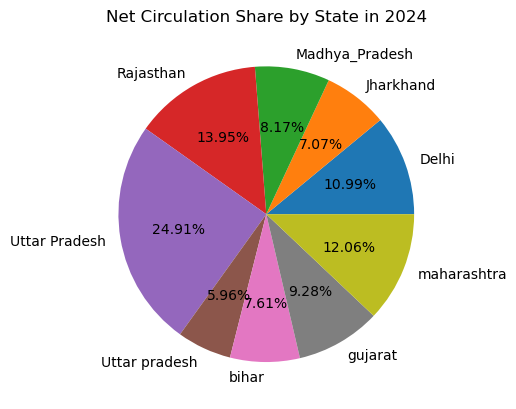

In [63]:
plt.pie(net_c_analysis['Net_Circulation'], 
        labels=net_c_analysis['State'], 
        autopct='%.2f%%')
plt.title("Net Circulation Share by State in 2024")

plt.savefig('Net Circulation by Each State in 2024.png')  # ✅ Save first
plt.show()  # ✅ Then display
plt.close()  # Optional: good practice in loops


In [64]:
fact_sales.head()

edition_ID City_ID Language           State    Month  Copies Sold  \
0     ED1005    C005    Hindi       Rajasthan      May       404389   
1     ED1005    C005    Hindi       Rajasthan    March       492943   
2     ED1001    C001    hindi   Uttar pradesh     July       168893   
3     ED1003    C003    Hindi  Madhya_Pradesh     July       216540   
4     ED1007    C007    Hindi       Jharkhand  October       234563   

   copies_returned  Net_Circulation  Year  Day  Day_Name  
0            13510           390879  2023    1    Monday  
1            25024           467919  2019    1    Friday  
2            12285           156608  2023    1  Saturday  
3            10117           206423  2023    1  Saturday  
4            13048           221515  2020    1  Thursday

In [65]:
fact_sales['Copies Printed']=fact_sales['Copies Sold']+fact_sales['copies_returned']

In [70]:
net_c_vs_p=fact_sales.groupby(['Year','State'])[['Copies Printed','Net_Circulation']].sum().reset_index()

In [74]:
net_c_vs_p

Year           State  Copies Printed  Net_Circulation  Gap
0   2019           Delhi         4862344          4354258    0
1   2019       Jharkhand         3094155          2775795    0
2   2019  Madhya_Pradesh         3603090          3268206    0
3   2019       Rajasthan         6114687          5589285    0
4   2019   Uttar Pradesh        11099946          9876922    0
5   2019   Uttar pradesh         2601305          2336155    0
6   2019           bihar         3393303          3020231    0
7   2019         gujarat         4084089          3624541    0
8   2019     maharashtra         5256251          4742773    0
9   2020           Delhi         4608009          4157369    0
10  2020       Jharkhand         2996467          2698673    0
11  2020  Madhya_Pradesh         3421767          3047725    0
12  2020       Rajasthan         5790073          5215347    0
13  2020   Uttar Pradesh        10389265          9362813    0
14  2020   Uttar pradesh         2491326          2234098    0
15  2020           bihar         3144646          2835608    0
16  2020         gujarat         3924498          3455134    0
17  2020     maharashtra         5107030          4560074    0
18  2021           Delhi         4360039          3904669    0
19  2021       Jharkhand         2807377          2570361    0
20  2021  Madhya_Pradesh         3244969          2925205    0
21  2021       Rajasthan         5475602          4939028    0
22  2021   Uttar Pradesh         9744380          8724160    0
23  2021   Uttar pradesh         2376377          2115877    0
24  2021           bihar         3035285          2705571    0
25  2021         gujarat         3680131          3314195    0
26  2021     maharashtra         4790616          4289158    0
27  2022           Delhi         4137996          3706456    0
28  2022       Jharkhand         2642972          2362394    0
29  2022  Madhya_Pradesh         3027748          2731598    0
30  2022       Rajasthan         5268178          4726524    0
31  2022   Uttar Pradesh         9259271          8337437    0
32  2022   Uttar pradesh         2219969          2003659    0
33  2022           bihar         2833895          2537303    0
34  2022         gujarat         3469597          3109889    0
35  2022     maharashtra         4408222          4007558    0
36  2023           Delhi         3888045          3446969    0
37  2023       Jharkhand         2494875          2240743    0
38  2023  Madhya_Pradesh         2879155          2578581    0
39  2023       Rajasthan         4968025          4433929    0
40  2023   Uttar Pradesh         8710841          7880777    0
41  2023   Uttar pradesh         2091398          1880340    0
42  2023           bihar         2664397          2402387    0
43  2023         gujarat         3239259          2905303    0
44  2023     maharashtra         4229402          3792254    0
45  2024           Delhi         3704080          3252010    0
46  2024       Jharkhand         2309444          2092062    0
47  2024  Madhya_Pradesh         2711605          2418567    0
48  2024       Rajasthan         4594153          4128641    0
49  2024   Uttar Pradesh         8229074          7373790    0
50  2024   Uttar pradesh         1970392          1763256    0
51  2024           bihar         2506557          2252819    0
52  2024         gujarat         3046823          2746691    0
53  2024     maharashtra         3982371          3569229    0

In [75]:
net_c_vs_p['Gap']=net_c_vs_p['Copies Printed']- net_c_vs_p['Net_Circulation']

In [76]:
net_c_vs_p.head()

Year           State  Copies Printed  Net_Circulation      Gap
0  2019           Delhi         4862344          4354258   508086
1  2019       Jharkhand         3094155          2775795   318360
2  2019  Madhya_Pradesh         3603090          3268206   334884
3  2019       Rajasthan         6114687          5589285   525402
4  2019   Uttar Pradesh        11099946          9876922  1223024

In [84]:
for state in net_c_analysis['State'].unique():
    data = net_c_vs_p[net_c_vs_p['State'] == state]
    plt.figure(figsize=(8,4))
    plt.plot(data['Year'], data['Gap'], marker='o', label='Gap')
    plt.title(f"Gap Between Copies Printed and Net Circulation - {state}")
    plt.xlabel("Year")
    plt.ylabel("Gap")
    plt.legend()
    plt.grid(True)
    
    # ✅ Save file correctly
    plt.savefig(f"{state}.png")  # or f"{state.replace(' ', '_')}.png" for no spaces
    plt.close()
    


In [85]:
fact_ad_revenue.head()

edition_id ad_category   quarter_old  Ad_revenue_euro  Ad_revenue_inr  Year  \
0     ED1005        A001       2023-Q2       22613.6900    2.004251e+06  2023   
1     ED1005        A002       Q1-2019       33461.8480    2.965724e+06  2019   
2     ED1001        A003       Q3-2023       40808.4600    3.616854e+06  2023   
3     ED1003        A002       Q3-2023       34824.1175    3.086462e+06  2023   
4     ED1007        A003  4th Qtr 2020       44012.4900    3.900827e+06  2020   

  Quarter  
0      Q2  
1      Q1  
2      Q3  
3      Q3  
4      Q4

In [86]:
fact_ad_revenue.shape

(720, 7)

In [87]:
combined_data.head()

edition_id city_id language      state     month  net_circulation  \
0     ED1005    C005    Hindi  Rajasthan      July           387843   
1     ED1005    C005    Hindi  Rajasthan    August           370827   
2     ED1005    C005    Hindi  Rajasthan  February           396694   
3     ED1005    C005    Hindi  Rajasthan     April           438685   
4     ED1005    C005    Hindi  Rajasthan     April           350008   

   print_year ad_category quarter_old  ad_revenue_euro  ad_revenue_inr  \
0        2022        A001     2023-Q2         22613.69    2.004251e+06   
1        2023        A001     2023-Q2         22613.69    2.004251e+06   
2        2021        A001     2023-Q2         22613.69    2.004251e+06   
3        2021        A001     2023-Q2         22613.69    2.004251e+06   
4        2023        A001     2023-Q2         22613.69    2.004251e+06   

   ad_year quarter  
0     2023      Q2  
1     2023      Q2  
2     2023      Q2  
3     2023      Q2  
4     2023      Q2

In [89]:
fact_ad_revenue.columns

Index(['edition_id', 'ad_category', 'quarter_old', 'Ad_revenue_euro',
       'Ad_revenue_inr', 'Year', 'Quarter'],
      dtype='object')

In [90]:
ad_rev_evo=fact_ad_revenue.groupby(['ad_category','Year'])['Ad_revenue_inr'].sum().reset_index()

In [91]:
ad_rev_evo

ad_category  Year  Ad_revenue_inr
0         A001  2019    1.238229e+08
1         A001  2020    1.017239e+08
2         A001  2021    9.746250e+07
3         A001  2022    1.050268e+08
4         A001  2023    9.977533e+07
5         A001  2024    1.033781e+08
6         A002  2019    8.137805e+07
7         A002  2020    5.122902e+07
8         A002  2021    7.425501e+07
9         A002  2022    6.949430e+07
10        A002  2023    8.330433e+07
11        A002  2024    5.774957e+07
12        A003  2019    8.128835e+07
13        A003  2020    9.443678e+07
14        A003  2021    1.215274e+08
15        A003  2022    1.059642e+08
16        A003  2023    1.102275e+08
17        A003  2024    1.084294e+08
18        A004  2019    6.108437e+07
19        A004  2020    8.893285e+07
20        A004  2021    5.619529e+07
21        A004  2022    6.414243e+07
22        A004  2023    6.341531e+07
23        A004  2024    8.490150e+07

In [93]:
for ad in ad_rev_evo['ad_category'].unique():
    data = ad_rev_evo[ad_rev_evo['ad_category'] == ad]
    plt.figure(figsize=(8,4))
    plt.plot(data['Year'], data['Ad_revenue_inr'], marker='o', label='Ad_revenue_inr')
    plt.title(f"Trend in Ad_revenue accross each - {ad}")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    
    # ✅ Save file correctly
    plt.savefig(f"4{ad}.png")  # or f"{state.replace(' ', '_')}.png" for no spaces
    plt.close()


In [102]:
city_performance = combined_data.groupby('state')[['ad_revenue_inr', 'net_circulation']].sum().reset_index()

print(city_performance.sort_values('ad_revenue_inr', ascending=False))

            state  ad_revenue_inr  net_circulation
4   Uttar pradesh    1.115729e+09         44429384
1       Jharkhand    5.588447e+08         26098716
3       Rajasthan    5.400742e+08         85143715
2  Madhya_Pradesh    3.787149e+08         31137402
5   Uttar-Pradesh    3.140903e+08         27566386
0           Delhi    2.820279e+08         20579558
6     maharashtra    1.691663e+08         46683894


In [103]:
city_performance.head()

state  ad_revenue_inr  net_circulation
0           Delhi    2.820279e+08         20579558
1       Jharkhand    5.588447e+08         26098716
2  Madhya_Pradesh    3.787149e+08         31137402
3       Rajasthan    5.400742e+08         85143715
4   Uttar pradesh    1.115729e+09         44429384

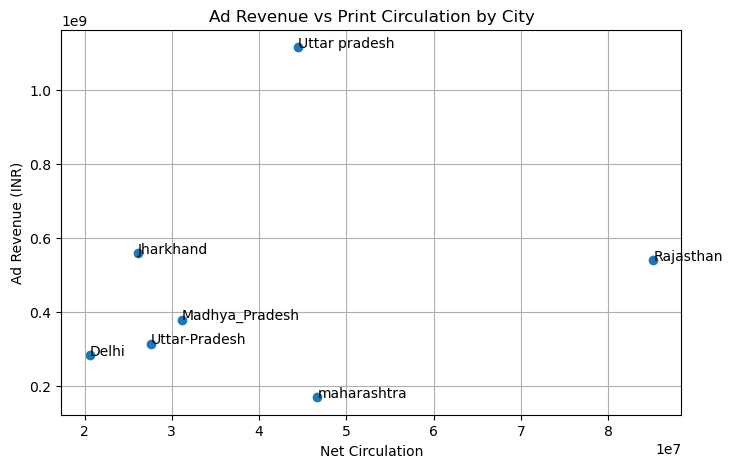

In [106]:
plt.figure(figsize=(8,5))
plt.scatter(city_performance['net_circulation'], city_performance['ad_revenue_inr'])
plt.title('Ad Revenue vs Print Circulation by City')
plt.xlabel('Net Circulation')
plt.ylabel('Ad Revenue (INR)')
plt.grid(True)

# Annotate city labels
for i, txt in enumerate(city_performance['state']):
    plt.annotate(txt, (city_performance['net_circulation'][i], city_performance['ad_revenue_inr'][i]))
plt.savefig('City_Adre_Vs Print_Circulation')
plt.show()


In [107]:
fact_digital.head()

Unnamed: 0           platform launch_month ad_category_id  dev_cost  \
0           0  PDF WhatsApp Push      2021-01           A001    236570   
1           1  PDF WhatsApp Push      2021-02           A001    156865   
2           2  PDF WhatsApp Push      2021-03           A001    242728   
3           3  PDF WhatsApp Push      2021-04           A001    147695   
4           4  PDF WhatsApp Push      2021-05           A001    325906   

   marketing_cost  users_reached  downloads_or_accesses  avg_bounce_rate  \
0           66060          23509                  16319            52.55   
1           99122          19472                  17017            82.53   
2           46087           8471                   2891            68.06   
3           78868          46796                  15640            66.17   
4          135644          16805                   3231            76.90   

                  cumulative_feedback_from_customers city_id     Month  Year  
0  Mixed feedback: some usability concerns, but h...    C001   January  2021  
1  Mixed feedback: some usability concerns, but h...    C002  February  2021  
2  Mixed feedback: some usability concerns, but h...    C003     March  2021  
3  Mixed feedback: some usability concerns, but h...    C004     April  2021  
4  The site takes too long to load on average pho...    C005       May  2021

In [108]:
fact_city.head()

city_id  literacy_rate  smartphone_penetration  internet_penetration  Year  \
0    C001          89.16                   75.76                 56.53  2019   
1    C001          88.76                   76.45                 55.97  2019   
2    C001          88.83                   75.32                 56.52  2019   
3    C001          89.25                   75.83                 56.94  2019   
4    C001          89.13                   75.03                 56.45  2020   

  Quarter  
0      Q1  
1      Q2  
2      Q3  
3      Q4  
4      Q1

In [109]:
fact_city.shape

(240, 6)

In [110]:
fact_city['city_id'].value_counts()

C001    24
C002    24
C003    24
C004    24
C005    24
C006    24
C007    24
C008    24
C009    24
C010    24
Name: city_id, dtype: int64

In [111]:
fact_sales['State'].value_counts()

Uttar Pradesh     144
Rajasthan          72
Uttar pradesh      72
Madhya_Pradesh     72
Jharkhand          72
maharashtra        72
Delhi              72
gujarat            72
bihar              72
Name: State, dtype: int64

In [3]:
fact_sales.head()

edition_ID City_ID Language           State    Month Copies Sold  \
0     ED1005    C005    Hindi       Rajasthan      May      404389   
1     ED1005    C005    Hindi       Rajasthan    March      492943   
2     ED1001    C001    hindi   Uttar pradesh     July      168893   
3     ED1003    C003    Hindi  Madhya_Pradesh     July      216540   
4     ED1007    C007    Hindi       Jharkhand  October      234563   

   copies_returned  Net_Circulation  Year  Day  Day_Name  
0            13510           390879  2023    1    Monday  
1            25024           467919  2019    1    Friday  
2            12285           156608  2023    1  Saturday  
3            10117           206423  2023    1  Saturday  
4            13048           221515  2020    1  Thursday

In [4]:
fact_sales['City_ID'].value_counts().index

Index(['C005', 'C001', 'C003', 'C007', 'C006', 'C010', 'C002', 'C009', 'C004',
       'C008'],
      dtype='object')

In [23]:
state_map = {
    'C001': 'Uttar Pradesh',   # 1
    'C005': 'Rajasthan',       # 5
    'C008': 'Uttar Pradesh',   # 8
    'C010': 'Uttar Pradesh',   # 10
    'C003': 'Madhya Pradesh',  # 3
    'C007': 'Jharkhand',       # 7
    'C002': 'Delhi',           # 2
    'C004': 'Bihar',           # 4
    'C006': 'Maharashtra',     # 6
    'C009': 'Gujarat'          # 9
}


In [24]:
def create_city(text):
    return state_map[text]
fact_city['City']=fact_city['city_id'].apply(create_city)

In [25]:
combined_data['state']=combined_data['state'].replace('Uttar-Pradesh','Uttar pradesh')

In [26]:
fact_city.head()

city_id  literacy_rate  smartphone_penetration  internet_penetration  Year  \
0    C001          89.16                   75.76                 56.53  2019   
1    C001          88.76                   76.45                 55.97  2019   
2    C001          88.83                   75.32                 56.52  2019   
3    C001          89.25                   75.83                 56.94  2019   
4    C001          89.13                   75.03                 56.45  2020   

  Quarter  digital_readiness           City  
0      Q1          73.816667  Uttar Pradesh  
1      Q2          73.726667  Uttar Pradesh  
2      Q3          73.556667  Uttar Pradesh  
3      Q4          74.006667  Uttar Pradesh  
4      Q1          73.536667  Uttar Pradesh

In [28]:
# Ensure correct datatypes
df_engagement=fact_digital.copy()
fact_city['literacy_rate'] = pd.to_numeric(fact_city['literacy_rate'], errors='coerce')
fact_city['smartphone_penetration'] = pd.to_numeric(fact_city['smartphone_penetration'], errors='coerce')
fact_city['internet_penetration'] = pd.to_numeric(fact_city['internet_penetration'], errors='coerce')

# Fill NaN with 0 or with column mean
fact_city.fillna(0, inplace=True)

# Recalculate digital readiness
fact_city['digital_readiness'] = (
    fact_city['literacy_rate'] +
    fact_city['smartphone_penetration'] +
    fact_city['internet_penetration']
) / 3

# Step 2: Aggregate readiness by City ID
readiness_scores = fact_city.groupby(['city_id','City'])['digital_readiness'].mean().reset_index()

# Step 3: Aggregate engagement metrics in df_engagement
engagement_scores = df_engagement.groupby('city_id').agg({
    'users_reached': 'mean',
    'downloads_or_accesses': 'mean',
    'avg_bounce_rate': 'mean'
}).reset_index()

# Step 4: Merge both datasets
merged_scores = readiness_scores.merge(engagement_scores, on='city_id', how='left')

# Step 5: Define engagement score
merged_scores['engagement_score'] = (
    merged_scores['users_reached'] * 0.5 +
    merged_scores['downloads_or_accesses'] * 0.5
)

# ✅ Step 6 (Relaxed Criteria): Top 40% readiness & Bottom 50% engagement
readiness_threshold = merged_scores['digital_readiness'].quantile(0.40)  # Top 60%
engagement_threshold = merged_scores['engagement_score'].quantile(0.50)  # Lower half

at_risk_cities = merged_scores[
    (merged_scores['digital_readiness'] >= readiness_threshold) &
    (merged_scores['engagement_score'] <= engagement_threshold)
]

print("Cities with High Readiness but Low Engagement (Relaxed Criteria):")
print(at_risk_cities)


Cities with High Readiness but Low Engagement (Relaxed Criteria):
  city_id           City  digital_readiness  users_reached  \
3    C004          Bihar          70.526806        24394.8   
7    C008  Uttar Pradesh          75.098750        17749.8   

   downloads_or_accesses  avg_bounce_rate  engagement_score  
3                12478.0           63.854           18436.4  
7                 7257.8           72.798           12503.8  


In [18]:
at_risk_cities

city_id           City  digital_readiness  users_reached  \
3    C004          Bihar          70.526806        24394.8   
7    C008  Uttar Pradesh          75.098750        17749.8   

   downloads_or_accesses  avg_bounce_rate  engagement_score  
3                12478.0           63.854           18436.4  
7                 7257.8           72.798           12503.8

In [132]:
fact_digital.head()

Unnamed: 0           platform launch_month ad_category_id  dev_cost  \
0           0  PDF WhatsApp Push      2021-01           A001    236570   
1           1  PDF WhatsApp Push      2021-02           A001    156865   
2           2  PDF WhatsApp Push      2021-03           A001    242728   
3           3  PDF WhatsApp Push      2021-04           A001    147695   
4           4  PDF WhatsApp Push      2021-05           A001    325906   

   marketing_cost  users_reached  downloads_or_accesses  avg_bounce_rate  \
0           66060          23509                  16319            52.55   
1           99122          19472                  17017            82.53   
2           46087           8471                   2891            68.06   
3           78868          46796                  15640            66.17   
4          135644          16805                   3231            76.90   

                  cumulative_feedback_from_customers city_id     Month  Year  
0  Mixed feedback: some usability concerns, but h...    C001   January  2021  
1  Mixed feedback: some usability concerns, but h...    C002  February  2021  
2  Mixed feedback: some usability concerns, but h...    C003     March  2021  
3  Mixed feedback: some usability concerns, but h...    C004     April  2021  
4  The site takes too long to load on average pho...    C005       May  2021

In [4]:
combined_data.head()

edition_id city_id language      state     month  net_circulation  \
0     ED1005    C005    Hindi  Rajasthan      July           387843   
1     ED1005    C005    Hindi  Rajasthan    August           370827   
2     ED1005    C005    Hindi  Rajasthan  February           396694   
3     ED1005    C005    Hindi  Rajasthan     April           438685   
4     ED1005    C005    Hindi  Rajasthan     April           350008   

   print_year ad_category quarter_old  ad_revenue_euro  ad_revenue_inr  \
0        2022        A001     2023-Q2         22613.69    2.004251e+06   
1        2023        A001     2023-Q2         22613.69    2.004251e+06   
2        2021        A001     2023-Q2         22613.69    2.004251e+06   
3        2021        A001     2023-Q2         22613.69    2.004251e+06   
4        2023        A001     2023-Q2         22613.69    2.004251e+06   

   ad_year quarter  
0     2023      Q2  
1     2023      Q2  
2     2023      Q2  
3     2023      Q2  
4     2023      Q2

In [5]:
combined_data['ROI']=combined_data['ad_revenue_inr']/combined_data['net_circulation']

In [6]:
combined_data

edition_id city_id language      state     month  net_circulation  \
0       ED1005    C005    Hindi  Rajasthan      July           387843   
1       ED1005    C005    Hindi  Rajasthan    August           370827   
2       ED1005    C005    Hindi  Rajasthan  February           396694   
3       ED1005    C005    Hindi  Rajasthan     April           438685   
4       ED1005    C005    Hindi  Rajasthan     April           350008   
..         ...     ...      ...        ...       ...              ...   
995     ED1005    C005    Hindi  Rajasthan   January           361160   
996     ED1005    C005    Hindi  Rajasthan  December           362339   
997     ED1005    C005    Hindi  Rajasthan   October           460572   
998     ED1005    C005    Hindi  Rajasthan     April           425503   
999     ED1005    C005    Hindi  Rajasthan       May           392138   

     print_year ad_category quarter_old  ad_revenue_euro  ad_revenue_inr  \
0          2022        A001     2023-Q2        22613.690    2.004251e+06   
1          2023        A001     2023-Q2        22613.690    2.004251e+06   
2          2021        A001     2023-Q2        22613.690    2.004251e+06   
3          2021        A001     2023-Q2        22613.690    2.004251e+06   
4          2023        A001     2023-Q2        22613.690    2.004251e+06   
..          ...         ...         ...              ...             ...   
995        2024        A003     2022-Q2        14836.008    1.314915e+06   
996        2024        A003     2022-Q2        14836.008    1.314915e+06   
997        2019        A003     2022-Q2        14836.008    1.314915e+06   
998        2020        A003     2022-Q2        14836.008    1.314915e+06   
999        2021        A003     2022-Q2        14836.008    1.314915e+06   

     ad_year quarter       ROI  
0       2023      Q2  5.167687  
1       2023      Q2  5.404815  
2       2023      Q2  5.052386  
3       2023      Q2  4.568771  
4       2023      Q2  5.726302  
..       ...     ...       ...  
995     2022      Q2  3.640811  
996     2022      Q2  3.628965  
997     2022      Q2  2.854962  
998     2022      Q2  3.090261  
999     2022      Q2  3.353196  

[1000 rows x 14 columns]

In [16]:
roi=combined_data.groupby(['state','ad_year'])['ROI'].mean().reset_index()

In [17]:
roi

state  ad_year        ROI
0            Delhi     2021  13.846736
1        Jharkhand     2020  21.663147
2   Madhya_Pradesh     2019  11.363876
3   Madhya_Pradesh     2023  13.227335
4        Rajasthan     2019   7.500203
5        Rajasthan     2022   3.310606
6        Rajasthan     2023   5.043816
7    Uttar pradesh     2022  26.141765
8    Uttar pradesh     2023  16.302098
9    Uttar pradesh     2024  26.983720
10     maharashtra     2021   4.400454
11     maharashtra     2024   2.927795

In [18]:
for state in roi['state'].unique():
    data = roi[roi['state'] == state]
    plt.figure(figsize=(8,4))
    plt.plot(data['ad_year'], data['ROI'], marker='o', label='Gap')
    plt.title(f"ROI- Classification AKA AD-Revenue vs Net-Circulation - {state}")
    plt.xlabel("Year")
    plt.ylabel("ROI")
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{state}.png')
    plt.close()
   
    


In [32]:
fact_city

city_id  literacy_rate  smartphone_penetration  internet_penetration  \
0      C001          89.16                   75.76                 56.53   
1      C001          88.76                   76.45                 55.97   
2      C001          88.83                   75.32                 56.52   
3      C001          89.25                   75.83                 56.94   
4      C001          89.13                   75.03                 56.45   
..      ...            ...                     ...                   ...   
235    C010          70.92                   77.75                 74.83   
236    C010          70.77                   77.29                 74.30   
237    C010          70.79                   77.86                 76.16   
238    C010          70.81                   77.53                 75.04   
239    C010          70.79                   78.67                 75.28   

     Year Quarter  digital_readiness           City  
0    2019      Q1          73.816667  Uttar Pradesh  
1    2019      Q2          73.726667  Uttar Pradesh  
2    2019      Q3          73.556667  Uttar Pradesh  
3    2019      Q4          74.006667  Uttar Pradesh  
4    2020      Q1          73.536667  Uttar Pradesh  
..    ...     ...                ...            ...  
235  2023      Q4          74.500000  Uttar Pradesh  
236  2024      Q1          74.120000  Uttar Pradesh  
237  2024      Q2          74.936667  Uttar Pradesh  
238  2024      Q3          74.460000  Uttar Pradesh  
239  2024      Q4          74.913333  Uttar Pradesh  

[240 rows x 8 columns]

In [34]:
fact_sales

edition_ID City_ID Language           State     Month Copies Sold  \
0       ED1005    C005    Hindi       Rajasthan       May      404389   
1       ED1005    C005    Hindi       Rajasthan     March      492943   
2       ED1001    C001    hindi   Uttar pradesh      July      168893   
3       ED1003    C003    Hindi  Madhya_Pradesh      July      216540   
4       ED1007    C007    Hindi       Jharkhand   October      234563   
..         ...     ...      ...             ...       ...         ...   
715     ED1001    C001    hindi   Uttar pradesh  December   â‚¹152122   
716     ED1002    C002  ENGLISH           Delhi  November      356211   
717     ED1004    C004    Hindi           bihar      July      203130   
718     ED1007    C007    Hindi       Jharkhand     April      253719   
719     ED1002    C002  ENGLISH           Delhi      July      348093   

     copies_returned  Net_Circulation  Year  Day  Day_Name  
0              13510           390879  2023    1    Monday  
1              25024           467919  2019    1    Friday  
2              12285           156608  2023    1  Saturday  
3              10117           206423  2023    1  Saturday  
4              13048           221515  2020    1  Thursday  
..               ...              ...   ...  ...       ...  
715             7049           145073  2024    1    Sunday  
716            25456           330755  2021    1    Monday  
717            12260           190870  2023    1  Saturday  
718            16510           237209  2019    1    Monday  
719            11620           336473  2021    1  Thursday  

[720 rows x 11 columns]

In [36]:
# Step A: Calculate YoY print decline per city
print_trends = fact_sales.groupby(['City_ID', 'Year'])['Net_Circulation'].sum().reset_index()

# Step B: Sort and compute Year-over-Year % change
print_trends['circulation_change'] = print_trends.groupby('City_ID')['Net_Circulation'].pct_change()

# Step C: Define decline as *negative* change (drop only)
print_decline_df = print_trends.groupby('City_ID')['circulation_change'].mean().reset_index()
print_decline_df.rename(columns={'circulation_change': 'print_decline_rate'}, inplace=True)


In [39]:
merged_scores.rename(columns={'city_id':"City_ID"},inplace=True)

In [43]:
# Step 1: Merge all three dimensions
priority_df = merged_scores.merge(print_decline_df, on='City_ID', how='left')

# Step 2: Normalize scores between 0 and 1
for col in ['digital_readiness', 'engagement_score', 'print_decline_rate']:
    priority_df[col + '_norm'] = (priority_df[col] - priority_df[col].min()) / (priority_df[col].max() - priority_df[col].min())

# Step 3: Weighted scoring
priority_df['final_priority_score'] = (
    0.4 * priority_df['digital_readiness_norm'] +
    0.4 * priority_df['engagement_score_norm'] +
    0.2 * priority_df['print_decline_rate_norm']
)

# Step 4: Rank top 3 cities
top_3_cities = priority_df.sort_values(by='final_priority_score', ascending=False).head(3)

print("🚀 Recommended Cities for Phase 1 Digital Relaunch:")
print(top_3_cities[['City_ID','City', 'digital_readiness', 'engagement_score', 'print_decline_rate', 'final_priority_score']])

🚀 Recommended Cities for Phase 1 Digital Relaunch:
  City_ID           City  digital_readiness  engagement_score  \
8    C009        Gujarat          72.735000          27216.75   
9    C010  Uttar Pradesh          74.178750          28239.25   
0    C001  Uttar Pradesh          73.494444          20684.80   

   print_decline_rate  final_priority_score  
8           -0.053911              0.926926  
9           -0.056885              0.858349  
0           -0.054691              0.743679  


In [30]:
fact_sales.head()

edition_ID City_ID Language           State    Month Copies Sold  \
0     ED1005    C005    Hindi       Rajasthan      May      404389   
1     ED1005    C005    Hindi       Rajasthan    March      492943   
2     ED1001    C001    hindi   Uttar pradesh     July      168893   
3     ED1003    C003    Hindi  Madhya_Pradesh     July      216540   
4     ED1007    C007    Hindi       Jharkhand  October      234563   

   copies_returned  Net_Circulation  Year  Day  Day_Name  
0            13510           390879  2023    1    Monday  
1            25024           467919  2019    1    Friday  
2            12285           156608  2023    1  Saturday  
3            10117           206423  2023    1  Saturday  
4            13048           221515  2020    1  Thursday

In [45]:
top_3_cities[['City','print_decline_rate', 'final_priority_score']]

City  print_decline_rate  final_priority_score
8        Gujarat           -0.053911              0.926926
9  Uttar Pradesh           -0.056885              0.858349
0  Uttar Pradesh           -0.054691              0.743679

In [74]:
fact_sales.to_csv('fact_print_sales.csv',index=False)
combined_data=fact_sales.merge(fact_ad_revenue,on='edition_id')

In [69]:
fact_ad_revenue.shape

(720, 7)

In [73]:
fact_sales.head()

edition_id City_ID Language           State    Month  Copies Sold  \
0     ED1005    C005    Hindi       Rajasthan      May       404389   
1     ED1005    C005    Hindi       Rajasthan    March       492943   
2     ED1001    C001    hindi   Uttar pradesh     July       168893   
3     ED1003    C003    Hindi  Madhya_Pradesh     July       216540   
4     ED1007    C007    Hindi       Jharkhand  October       234563   

   copies_returned  Net_Circulation  Year  Day  Day_Name  
0            13510           390879  2023    1    Monday  
1            25024           467919  2019    1    Friday  
2            12285           156608  2023    1  Saturday  
3            10117           206423  2023    1  Saturday  
4            13048           221515  2020    1  Thursday

In [75]:
combined_data.to_csv('combined_data.csv',index=False)